In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from arch.unitroot import ADF, PhillipsPerron, KPSS

In [2]:
df = pd.read_excel("C:/Users/htcso/Downloads/EVDS.xlsx")

In [3]:
df.head()

,Tarih,TL
0,2011-02,473.75
1,2011-03,487.00
2,2011-04,482.00
3,2011-05,511.50
4,2011-06,529.75


In [4]:
print(ADF(df["TL"]))

   Augmented Dickey-Fuller Results   
Test Statistic                  7.410
P-value                         1.000
Lags                               14
-------------------------------------

Trend: Constant
Critical Values: -3.48 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [5]:
print(PhillipsPerron(df["TL"]))

     Phillips-Perron Test (Z-tau)    
Test Statistic                 12.986
P-value                         1.000
Lags                               14
-------------------------------------

Trend: Constant
Critical Values: -3.47 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [6]:
print(KPSS(df["TL"]))

    KPSS Stationarity Test Results   
Test Statistic                  1.270
P-value                         0.001
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [7]:
Y = df["TL"]

In [8]:
Y_log = np.log(Y)

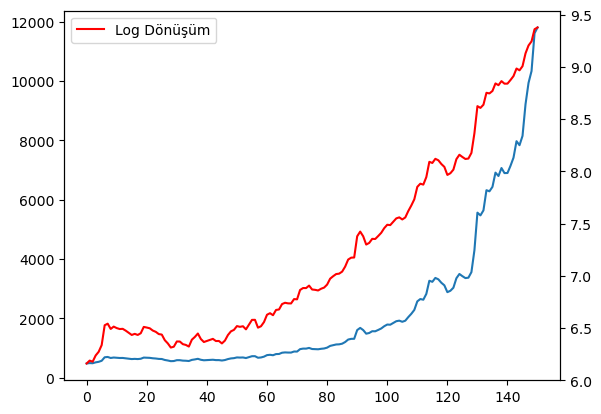

In [9]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(Y, label = "Orjinal")
ax2.plot(Y_log, color = "r", label = "Log Dönüşüm")
plt.legend()
plt.show();

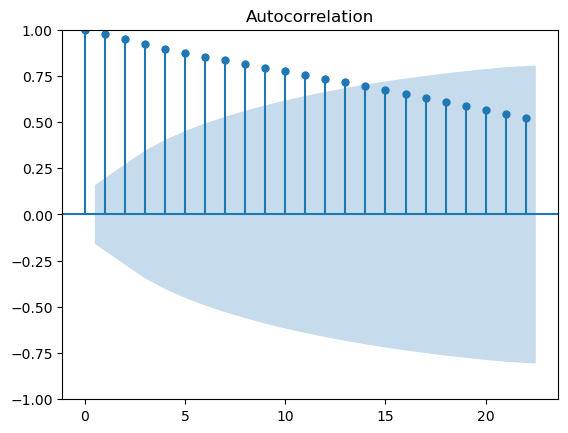

In [10]:
# Otokorelasyon fonk.  (Yavaş yavaş azalması seride bir birim kök olduğu anlamına gelir)
acf = plot_acf(Y_log)
plt.show();

In [11]:
adf = ADF(Y_log)
print(adf, "\n")
pp = PhillipsPerron(Y_log)
print(pp, "\n")
kpss = KPSS(Y_log)
print(kpss)

# Testlere göre de durağan olmama durumu devam etmektedir.

   Augmented Dickey-Fuller Results   
Test Statistic                  2.501
P-value                         0.999
Lags                                2
-------------------------------------

Trend: Constant
Critical Values: -3.48 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary. 

     Phillips-Perron Test (Z-tau)    
Test Statistic                  3.799
P-value                         1.000
Lags                               14
-------------------------------------

Trend: Constant
Critical Values: -3.47 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary. 

    KPSS Stationarity Test Results   
Test Statistic                  1.633
P-value                         0.000
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
N

In [12]:
Y_kok = np.sqrt(Y)

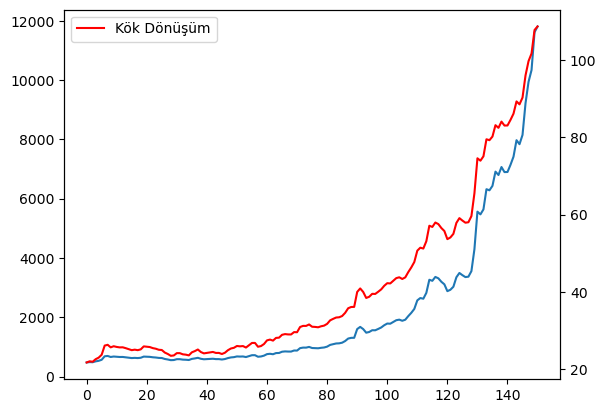

In [13]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(Y, label = "Orjinal")
ax2.plot(Y_kok, color = "r", label = "Kök Dönüşüm")
plt.legend()
plt.show();

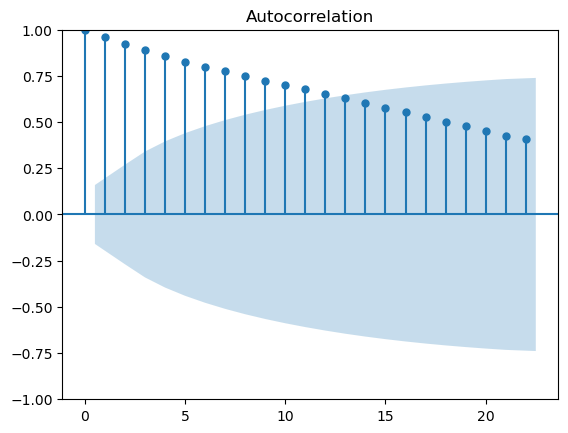

In [14]:
acf = plot_acf(Y_kok)
plt.show();

In [15]:
Y_diff1 = Y.diff().dropna() # Birinci dereceden kök alma

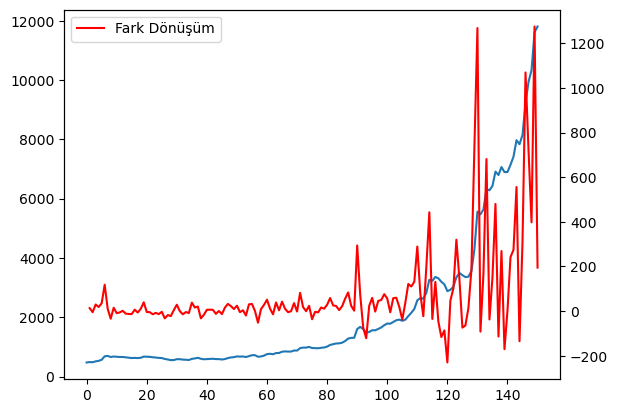

In [16]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(Y, label = "Orjinal")
ax2.plot(Y_diff1, color = "r", label = "Fark Dönüşüm")
plt.legend()
plt.show();

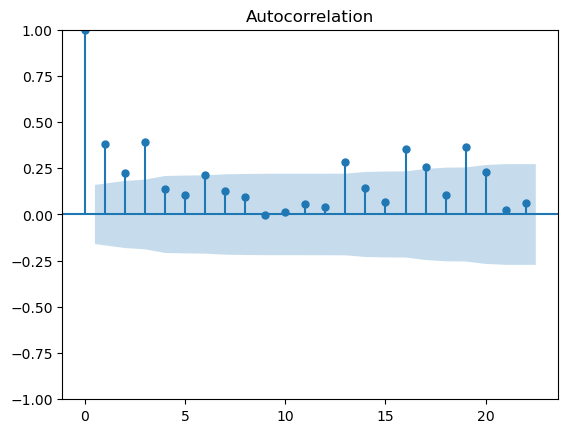

In [17]:
acf = plot_acf(Y_diff1)
plt.show();

In [18]:
adf = ADF(Y_diff1)
print(adf, "\n")
pp = PhillipsPerron(Y_diff1)
print(pp, "\n")
kpss = KPSS(Y_diff1)
print(kpss)

   Augmented Dickey-Fuller Results   
Test Statistic                  0.191
P-value                         0.972
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: -3.48 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary. 

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -9.320
P-value                         0.000
Lags                               14
-------------------------------------

Trend: Constant
Critical Values: -3.48 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary. 

    KPSS Stationarity Test Results   
Test Statistic                  0.997
P-value                         0.003
Lags                                7
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
N

In [19]:
Y_diff2 = Y.diff().diff().dropna() # İkinci dereceden fark alma

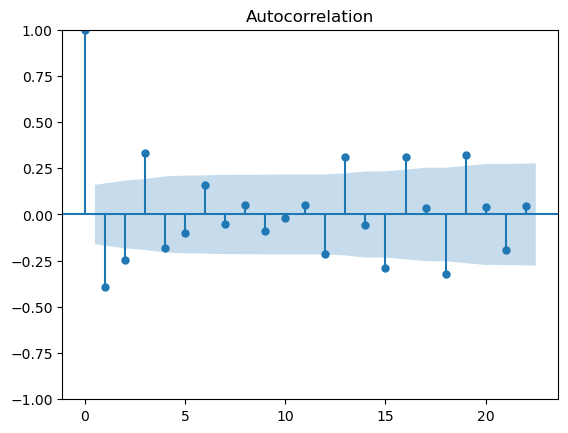

In [20]:
acf = plot_acf(Y_diff2)
plt.show();

In [21]:
adf = ADF(Y_diff2)
print(adf, "\n")
pp = PhillipsPerron(Y_diff2)
print(pp, "\n")
kpss = KPSS(Y_diff2)
print(kpss)

# seriler tüm testlere göre durağan.

   Augmented Dickey-Fuller Results   
Test Statistic                 -7.335
P-value                         0.000
Lags                               14
-------------------------------------

Trend: Constant
Critical Values: -3.48 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary. 

     Phillips-Perron Test (Z-tau)    
Test Statistic                -34.501
P-value                         0.000
Lags                               14
-------------------------------------

Trend: Constant
Critical Values: -3.48 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary. 

    KPSS Stationarity Test Results   
Test Statistic                  0.017
P-value                         0.996
Lags                                4
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
N